In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
EXPONENT = 2.

In [3]:
# Define model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear = nn.Linear(1, 1, bias=False)
        
    def forward(self, x):
        return torch.exp(self.linear(torch.log(x)))
    
model = Net()
with torch.no_grad():
    model.linear.weight.data = torch.tensor([[EXPONENT]])

In [4]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [5]:
model.train()
x = torch.tensor([[5.]]).T
y = x**EXPONENT
losses = []
for i in range(100):
    pred = model(x)
    loss = loss_fn(pred, y)
    losses.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0.5, 1.0, 'Losses')

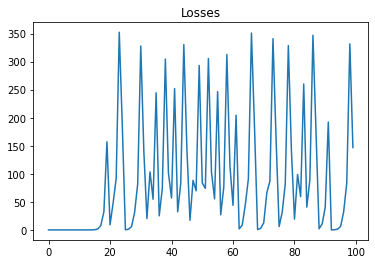

In [6]:
plt.plot(np.stack(losses))
plt.title("Losses")